## What are those chords?

#### Objective
See if it's possible to work out the first 4 chords of the song 'Love and Hate' by the BREED using fourier transform to work out the musical notes played


In [2]:
import IPython
IPython.display.Audio("./4chords.wav")


#### Each Chord
Split up, it sounds like this

In [3]:
print('Chord 1')
IPython.display.Audio("./audio/chord1.wav")

Chord 1


In [4]:
print('Chord 2')
IPython.display.Audio("./audio/chord2.wav")

Chord 2


In [5]:
print('Chord 3')
IPython.display.Audio("./audio/chord3.wav")

Chord 3


In [6]:
print('Chord 4')
IPython.display.Audio("./audio/chord4.wav")

Chord 4


### Import the audio and visualise

- Import the files and attempt fft. This may require converting to mono channel

In [7]:
#Imports
from scipy.io import wavfile
import numpy as np
import os

In [8]:
#Separate chords into dictionary
chords = {}

for _,_,files in os.walk('./audio'):
    for file in files:
        if '.wav' in file:
            samplerate, data = wavfile.read('./audio/{}'.format(file))
            chords[file] = np.mean(data,axis=1).astype(np.int16)    #mono version of chord



/var/folders/tt/n84f505x36xghf920ypy6x300000gn/T/ipykernel_38390/3342495149.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('./audio/{}'.format(file))


In [9]:
chords['chord1.wav']

array([  25,  -16,  -98, ..., 1024,  381, -350], dtype=int16)

To test, write out the file and play back

In [10]:
wavfile.write('./audio/mono/chord1.wav', samplerate, chords['chord1.wav'])

In [11]:
IPython.display.Audio("./audio/mono/chord1.wav")

## Visualise waveform

Write a function to visualise the waveform and the fourier transform of the chord

In [12]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from freqtonote import freq_to_note


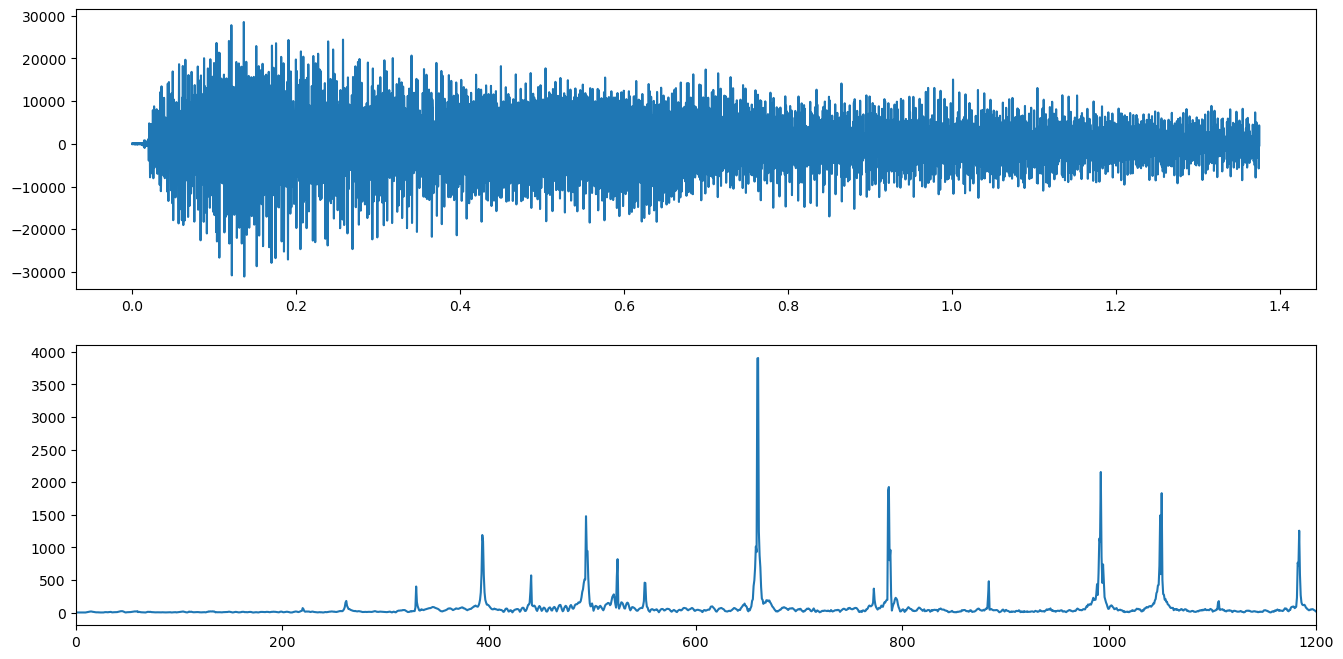

In [13]:
def showfft(data, fs=44100, thresh=1000):
    '''Plots fft and original signal, returns list of dominant frequencies
    Parameters
    -----------
    thresh: y axis threshold for return frequencies from fft'''
    N = len(data)
    yf = fft(data)
    xf = fftfreq(N, 1.0/fs)[:N//2]

    #plot it
    fig, ax = plt.subplots(2, figsize=(16,8))
    #Show original audio on plot 1
    ax[0].plot([x/fs for x in range(N)], data)

    #Show fft on plot two
    ax[1].plot(xf, 2.0/N * np.abs(yf[:N//2]))
    ax[1].set_xlim([0,1200])

    #Print out the dominant frequencies
    peaks, _ = find_peaks(2.0/N * np.abs(yf[:N//2]), thresh, threshold=20)
    dom_freqs = [xf[x] for x in peaks]
    
    return dom_freqs


freqs = showfft(chords['chord1.wav'], thresh=800)


In [14]:
freqs

[393.45778979830794,
 493.822253739466,
 524.3679601563402,
 658.1872454112175,
 786.9155795966159,
 788.3701370450385,
 990.5536223757772,
 992.0081798241997,
 1049.4631990368916,
 1050.9177564853142,
 1184.0097630159803,
 1315.647212098224]

Info for chord4.wav
[('F', 4), ('G', 4), ('D', 5), ('F', 5), ('G', 5), ('A', 5), ('A#', 5), ('C', 6), ('D', 6), ('D', 6), ('F', 6), ('F', 6)]
Info for chord3.wav
[('G', 4), ('G#', 4), ('C', 5), ('D#', 5), ('F', 5), ('G', 5), ('G', 5), ('G#', 5), ('A#', 5), ('C', 6), ('C', 6), ('D', 6), ('E', 6)]
Info for chord2.wav
[('F', 4), ('A', 4), ('E', 5), ('G', 5), ('A', 5), ('B', 5), ('C', 6), ('C', 6), ('E', 6)]
Info for chord1.wav
[('G', 4), ('B', 4), ('C', 5), ('E', 5), ('G', 5), ('G', 5), ('B', 5), ('B', 5), ('C', 6), ('C', 6), ('D', 6), ('E', 6)]


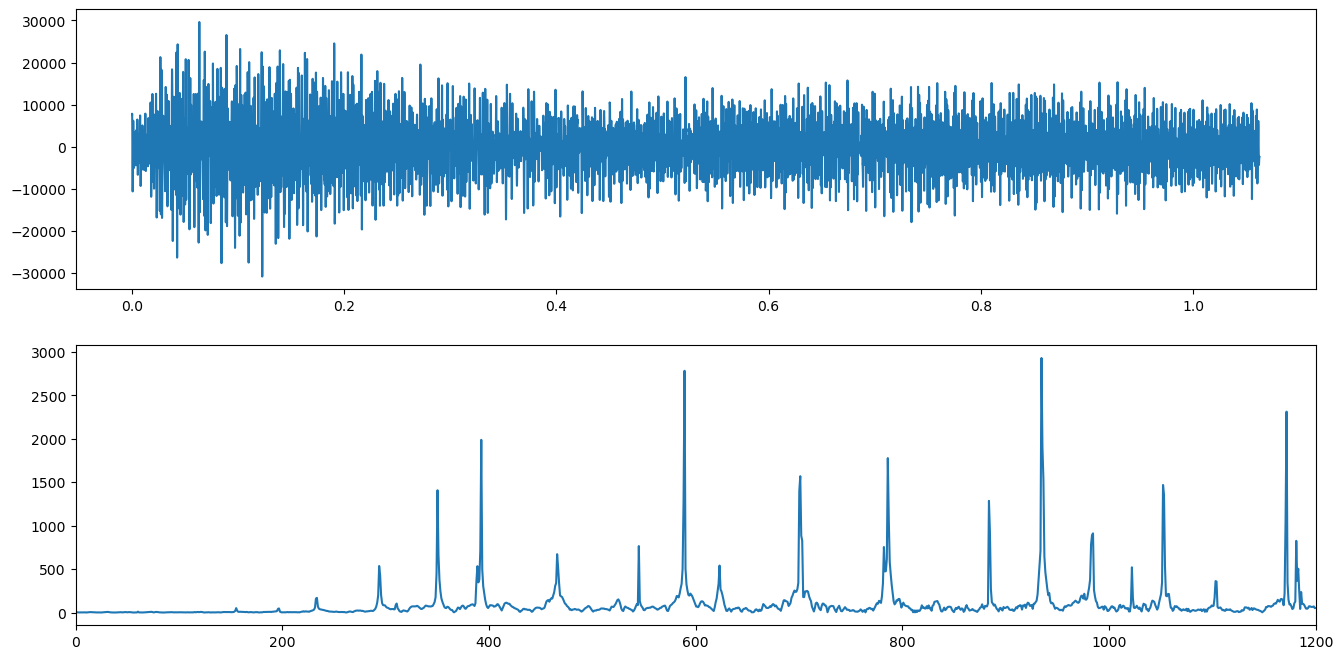

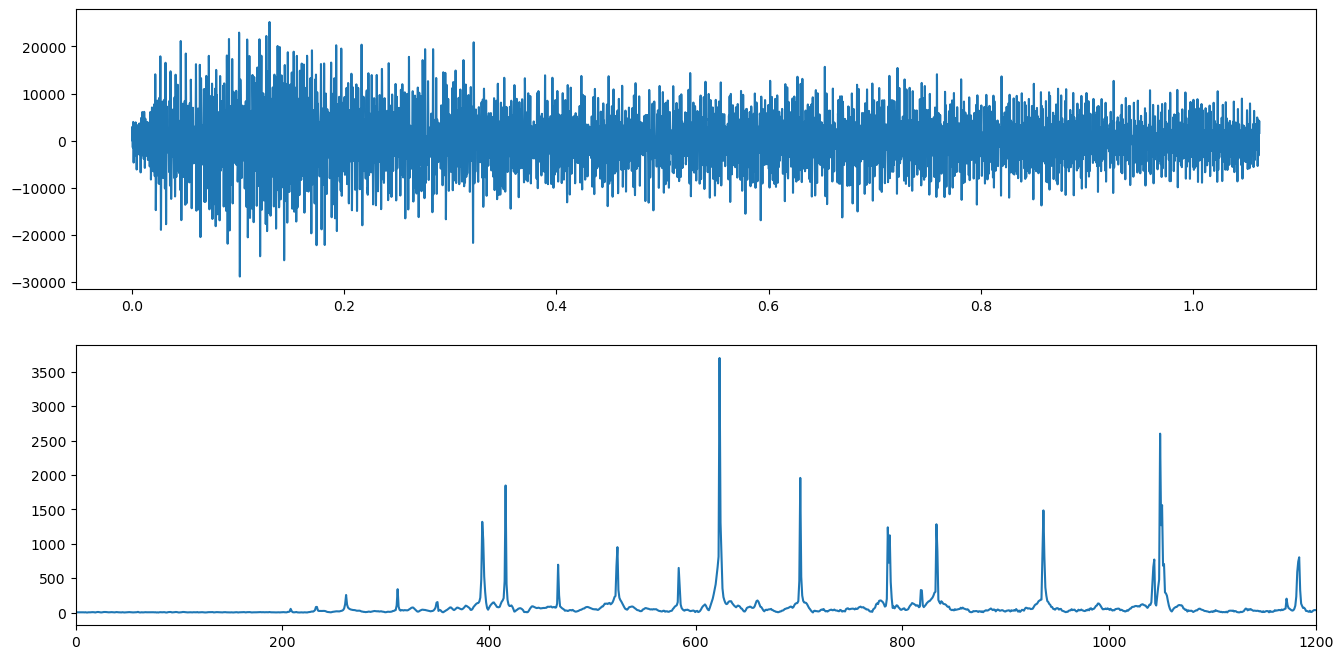

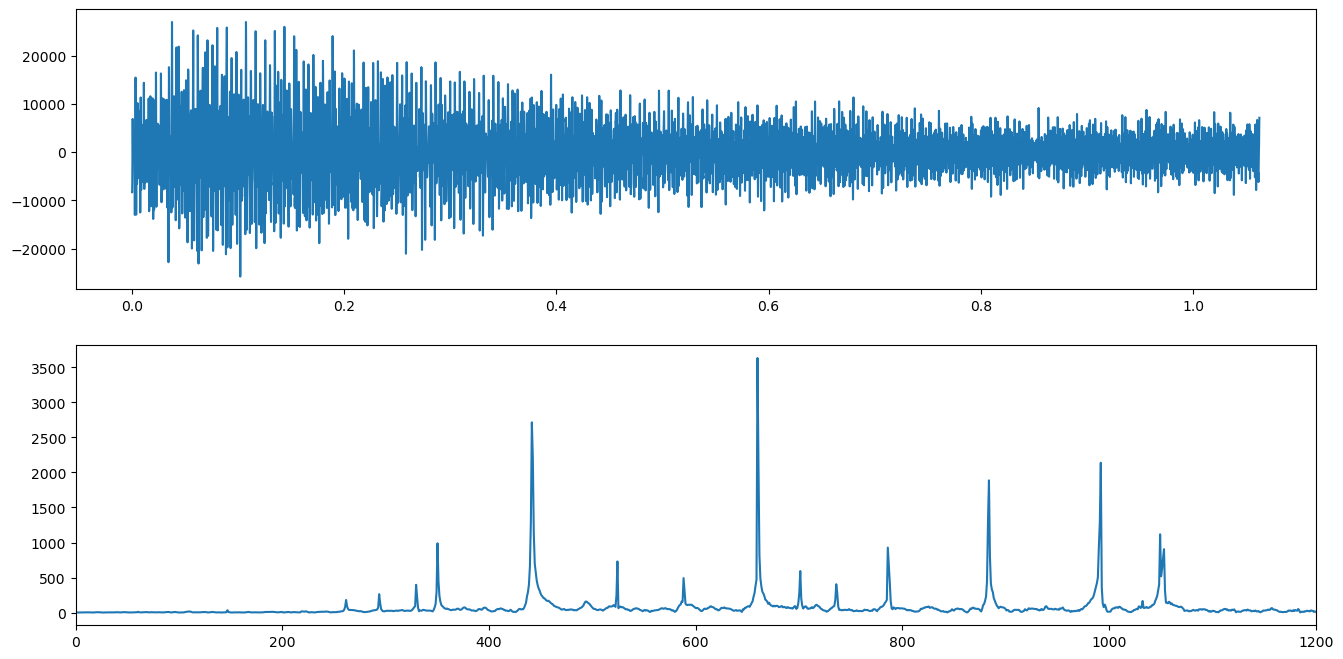

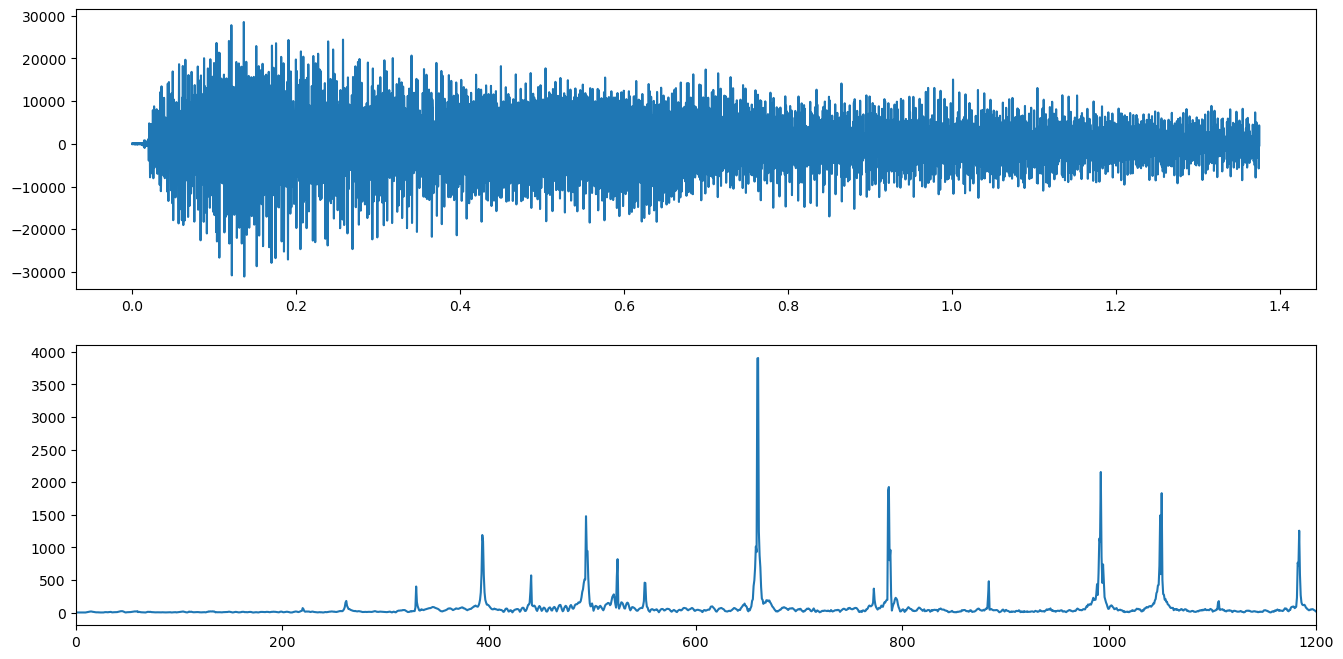

In [15]:
#Do it for every chord
for chord in chords:
    print('Info for {}'.format(chord))
    freqs = showfft(chords[chord], thresh=800)
    notes = [freq_to_note(x) for x in freqs]
    print(notes)


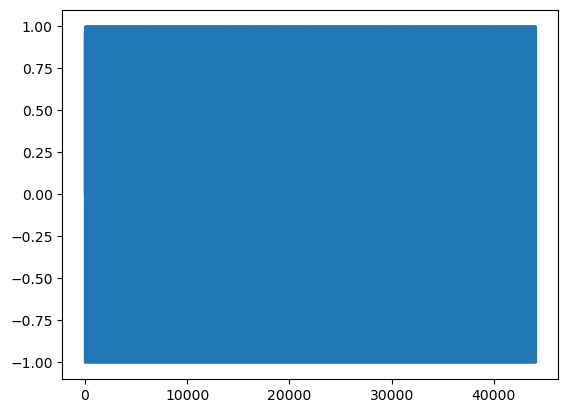

In [16]:
#Try recreate a similar sound using dominant frequencies
x = np.linspace(0.0, samplerate, samplerate, endpoint=False)
y = np.sin(2.0*np.pi*freqs[0]*x)

plt.plot(y)


